<a href="https://colab.research.google.com/github/mmjck/MachineLearning/blob/master/%5BAMMD%5D_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **KNN (K-Nearest Neighbors)**







(K — Nearest Neighbors) é um dos muitos algoritmos ( de aprendizagem supervisionada ). Ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado do outro. 

Se baseia na ideia de que dados similires tendem a estar concentrados em uma mesma região



##Primeiramente iremos falar sobre a intuição por trás do algoritmo **KNN**

Para entender o funcionamento do KNN, considere que temos um conjunto de dados dividido em duas classes: **azul** e **vermelho**, conforme a figura abaixo.




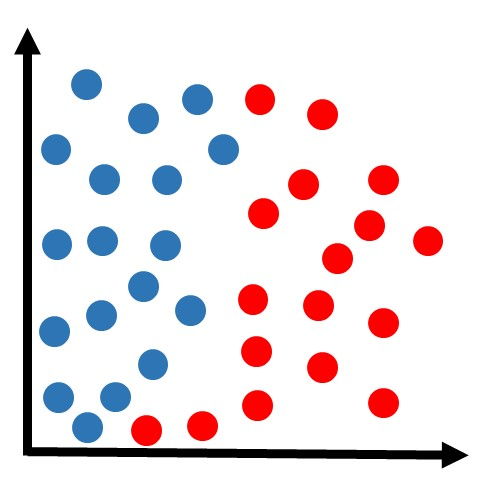


Quando um novo dado chega na etapa de classificação, ele é desconhecido pelo algoritmo, isto é, ainda não possui rótulo (**azul** ou **vermelho**). 







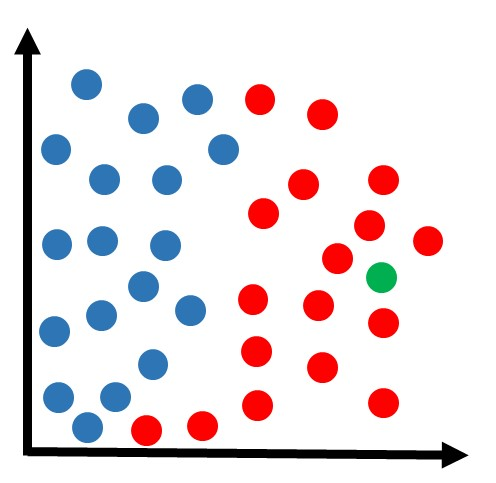


Observa-se que faz mais sentido classificar essa amostra como pertencendo à classe vermelha. No entanto, o algoritmo não possui a “intuição”, ele precisa de uma forma de medir a similaridade entre essa nova amostra com as demais.




Para medir a similaridade entre esses dados, o KNN utiliza funções de distâncias ou funções de similaridades. Ou seja, quanto mais próximos (**menor a distância**) ou mais similares (**maior a semelhança**) entre esses dados, maior a chance de eles pertenceram a uma mesma classe

O algoritmo observa o número de vizinhos próximos e determina sua classe. Por exemplo, para 3 vizinhos mais próximos, teremos: 


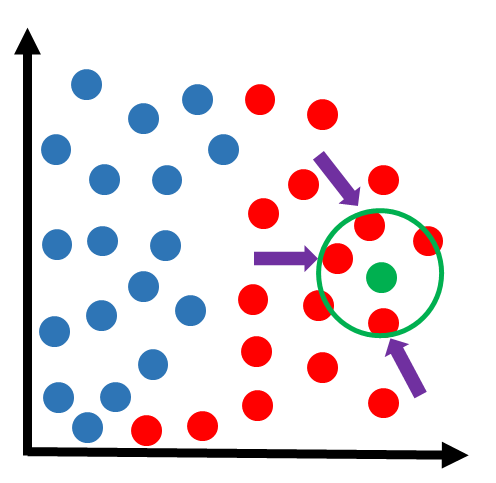

O algoritmo classifica essa nova amostra como pertencenta a classe **vermelha**, isto é, os 3 vizinhos mais próximos pertencen a classe **vermelha**

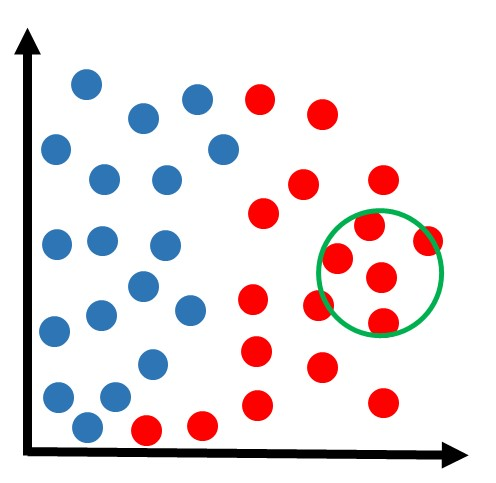

O k-NN utiliza uma função de distância ou uma  função de similaridade para    estabelecer o conceito de **vizinhança**

Calcular a **distância** ou **similaridade** é fundamental para o KNN. Para distancias, existem diversas funções utilizadas, e a escolha de qual usar varia de acordo com o problema. A mais utilizada é a distância Euclidiana, descrita pela equação abaixo.


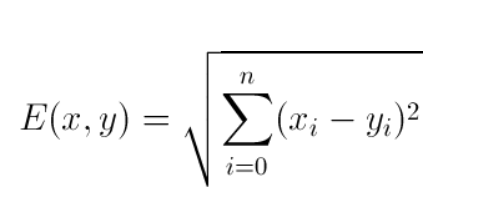


O **KNN** é um algoritmo baseado em memória, onde o processo de aprendizagem consiste em memorizar os dados. Ou seja, toda a computação é adiada até a fase de classificação. É chamado de um algoritmo prequiçoso por isso.



O objetivo do KNN é encontrar o melhor valor de  **K** a fim de obter a melhor capacidade de generalização da amostras

O valor de **K** deve ser menor ou igual a quantidade de elementos da base de dados.

Deve ser preferencialmente um valor  **impar**, pois evita que uma amostra possua empate em relação a quantidade de vizinhos mais próximos.


Em relação ao hiperparâmetro **K**, dependendo do valor, poderemos ter resultados diferentes para cada situação.

Quando o valor de K é pequeno, a classificação fica mais sensível a regiões bem próximas (podendo ocorrer o problema de **overfitting**). Com k grande, a classificação fica menos sujeita a ruídos pode ser considerada mais robusta, porém se k for grande demais, pode ser que haja o problema de **underfitting**.

**Aspectos negativos**


1.   Calcular a distância entre de um novo objeto com os demais pode ser custoso, dependendo da base de dados
2.   É afetado pela presença de atributos irrelevantes e reduntantes
3.   Computacionalmente caro - o algoritmo armazena todos os dados de treinamento




# Na prática

O exemplo abaixo  mostra implementação do KNN na  conjunto de dados Iris. O conjunto de dados Iris tem 50 amostras para cada espécie diferente de flor Iris (total de 150). 

Para cada amostra, temos comprimento e largura da sépala e comprimento e largura da pétala e um nome de espécie (classe).




1. **Característica**: (comprimento da sépala, largura da sépala, comprimento da pétala, largura da pétala)
2. Problema de classificação entre as diferentes espécies de Iris.

Setosa

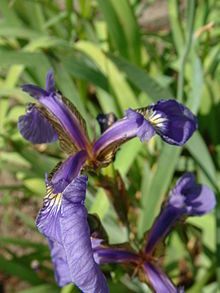

Versicolor


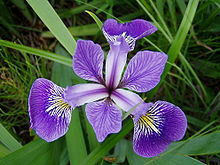

Virginica

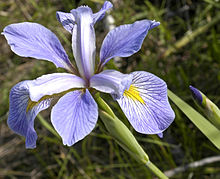

In [25]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

Carregando a base de dados Iris

In [2]:
iris = datasets.load_iris()

Cada amostra representa uma flor e 4 colunas representam 4 medidas. 



Podemos ver as características (medidas), bem como rótulos são representados pelas últimas duas columas (label e species). 




In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['label'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


Carregando a base Iris, onde X são as carecterísticas e y são os rótulos

In [4]:
X, y = datasets.load_iris(return_X_y=True)

Como podemos ver abaixo, os rótulos / respostas são codificados como **0** **1** **2** 

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Usamos a função **train_test_split** para dividir a base em treino e teste. Normalmente, usa-se 70% para treino e 30% para teste.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

Instanciando o classificador KNN como hiperparâmetro K = 1

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)

In [8]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [9]:
acc = knn.score(X_test,y_test)
print('Acurácia de {:.2%}\n'.format(acc))

Acurácia de 95.56%



O objetivo do classificador é encontrar o melhor valor de K, sendo assim, iremos visualizar o treino do classificador variando k entre 1 e 20;

In [10]:
all_scores = []

for k in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc = knn.score(X_test,y_test)
  all_scores.append(acc)
  

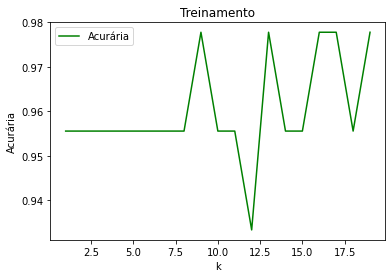

In [11]:
range_ = range(1,20)
plt.plot(range_, all_scores, 'g', label='Acurária')
plt.title('Treinamento')
plt.xlabel('k')
plt.ylabel('Acurária')
plt.legend()
plt.show()

O conjunto de dados Iris é pequeno, o que pode levar a problemas durante o treinamento do modelo. Pode ocorrer  **overfitting** (decorando os exemplos de treinamento ) ou  **underfitting** (desempenho do modelo já é ruim no próprio treinamento).

Para base de dados pequenas, utilizamos algumas técninas para contornar isso. Umas delas é a **validação cruzada**


**Validação cruzada** consiste em garantir que toda a base de dados seja utilizada na epata de treinamento

É uma espécie de hold-out, técnica onde particionamos o conjunto de dados. Não deve existir a possibilidade de uma amostra aparecer mais de uma vez nos outros folds


Um exemplo de validação cruzada pode ser visualizado na figura abaixo.


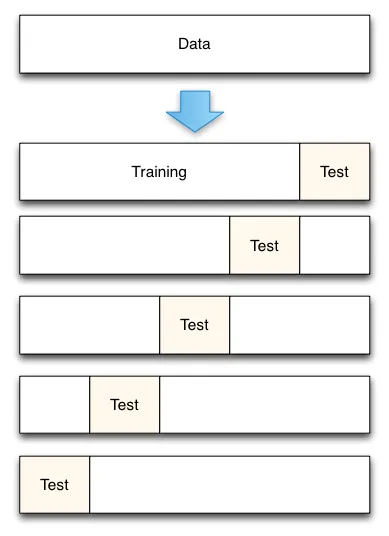

##Validação cruzada na pratica

Vamos analizar a apliação de validação cruzada no conjunto de dados Iris usando o classificador KNN

In [13]:
from sklearn.model_selection import cross_val_score


In [39]:
# Instanciando novamente KNN para k = 1
#

knn = KNeighborsClassifier(n_neighbors=1)


# Aplicando Validação cruzada ( Cross Validation )
#
scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')

In [40]:
scores

array([0.97368421, 0.92105263, 0.94594595, 1.        ])

In [41]:
scores.mean()

0.9601706970128023

O resultado acima representa a pontuação média do modelo que é avaliada a partir das médias dos valores de cada interação.

Abaixo, fazemos cross validation para k = 1 até 19

In [33]:
all_scores = []
for k in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')
  all_scores.append(scores)

In [34]:
all_scores

[array([0.97368421, 0.92105263, 0.94594595, 1.        ]),
 array([0.97368421, 0.92105263, 0.94594595, 0.97297297]),
 array([0.97368421, 0.94736842, 0.91891892, 1.        ]),
 array([0.97368421, 0.94736842, 0.91891892, 0.97297297]),
 array([0.97368421, 0.94736842, 0.94594595, 1.        ]),
 array([0.97368421, 0.97368421, 0.89189189, 0.97297297]),
 array([0.97368421, 0.97368421, 0.94594595, 0.97297297]),
 array([0.97368421, 1.        , 0.89189189, 0.97297297]),
 array([0.97368421, 0.94736842, 0.91891892, 0.97297297]),
 array([0.97368421, 0.97368421, 0.94594595, 0.97297297]),
 array([0.94736842, 0.97368421, 0.94594595, 0.97297297]),
 array([0.94736842, 1.        , 0.91891892, 0.97297297]),
 array([0.94736842, 1.        , 0.94594595, 0.97297297]),
 array([0.94736842, 1.        , 0.94594595, 0.97297297]),
 array([0.94736842, 1.        , 0.94594595, 0.97297297]),
 array([0.97368421, 1.        , 0.94594595, 0.97297297]),
 array([0.94736842, 0.97368421, 0.94594595, 0.97297297]),
 array([0.9736

In [35]:
all_scores = np.array(all_scores)
media_k = [x.mean() for x in all_scores]

In [36]:
media_k

[0.9601706970128023,
 0.9534139402560455,
 0.9599928876244666,
 0.9532361308677098,
 0.9667496443812233,
 0.9530583214793742,
 0.9665718349928876,
 0.9596372688477952,
 0.9532361308677098,
 0.9665718349928876,
 0.9599928876244666,
 0.9598150782361308,
 0.9665718349928876,
 0.9665718349928876,
 0.9665718349928876,
 0.9731507823613088,
 0.9599928876244666,
 0.9665718349928876,
 0.9599928876244666]

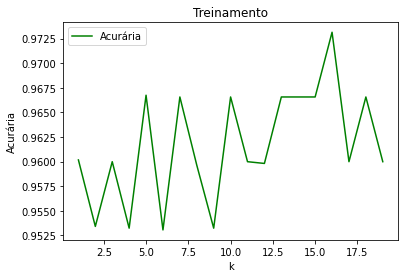

In [37]:
range_ = range(1,20)
plt.plot(range_, media_k, 'g', label='Acurária')
plt.title('Treinamento')
plt.xlabel('k')
plt.ylabel('Acurária')
plt.legend()
plt.show()